[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM.git/master?filepath=PySDM_examples/Kreidenweis_et_al_2003/demo.ipynb)    
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM/blob/master/PySDM_examples/Kreidenweis_et_al_2003/demo.ipynb)

#### based on Fig. 1 from Kreidenweis et al. 2003 (J. Geophys. Res. 108)  "_Modification of aerosol mass and size distribution due to aqueous‐phase SO2 oxidation in clouds: Comparisons of several models_"   
https://doi.org/10.1029/2002JD002697

In [1]:
"""
clone and install PySDM dependencies in Colab
"""
import os, sys
if 'google.colab' in sys.modules:
    %cd /content
    if not os.path.isdir('PySDM'):
        !git clone --depth 1 https://github.com/atmos-cloud-sim-uj/PySDM.git
        %cd PySDM
    else:
        %cd PySDM
        !git pull
    !pip --quiet install --requirement requirements.txt
    !ldconfig

In [2]:
import os, sys
if 'google.colab' in sys.modules:
    %cd /content/PySDM
else:
    sys.path.insert(0, os.path.join(os.getcwd(), '../..'))

In [8]:
from PySDM_examples.Kreidenweis_et_al_2003 import Settings, Simulation
from PySDM_examples.utils.show_plot import show_plot
from PySDM.physics import si
import numpy as np
from matplotlib import pyplot

In [4]:
settings = Settings(dt=1*si.s, n_sd=20, n_substep=10)
settings.output_interval = 25 * si.s

In [5]:
simulation = Simulation(settings)

In [6]:
output = simulation.run()

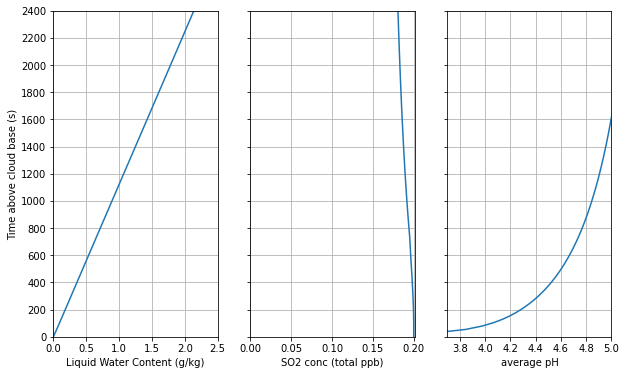

HTML(value="<a href='../utils/temporary_files/tmpj0re6m_k.pdf' target='_blank'>../utils/temporary_files/tmpj0r…

In [7]:
figsize = (10, 6)
fig, axs = pyplot.subplots(1, 3, figsize=figsize, sharey=True)

Y = np.asarray(output['t']) - 196 * si.s

axs[0].plot(output['ql'], Y)
axs[0].set_ylim(0, 2400 * si.s)
axs[0].set_xlim(0, 2.5)
axs[0].set_yticks(np.linspace(0, 2400, 13, endpoint=True))
axs[0].set_ylabel('Time above cloud base (s)')
axs[0].set_xlabel('Liquid Water Content (g/kg)')

axs[1].plot(np.asarray(output['aq_S_IV_ppb']) + np.asarray(output['gas_S_IV_ppb']), Y)
axs[1].set_xticks(np.linspace(0, 0.2, 5, endpoint=True))
axs[1].set_xlabel('SO2 conc (total ppb)')

axs[2].plot(output['pH'], Y)
axs[2].set_xlim(3.7, 5)
axs[2].set_xticks(np.linspace(3.8, 5, 7, endpoint=True))
axs[2].set_xlabel('average pH')

for ax in axs:
    ax.grid()
show_plot()